# AI model for training (shark fin) artifacts on GOES-R

[How to Train an Image Classifier in PyTorch and use it to Perform Basic Inference on Single Images](https://towardsdatascience.com/how-to-train-an-image-classifier-in-pytorch-and-use-it-to-perform-basic-inference-on-single-images-99465a1e9bf5)

[TRAINING A CLASSIFIER](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

[Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

[ROC curves for a simple CNN multi-class model](https://discuss.pytorch.org/t/roc-curves-for-a-simple-cnn-multi-class-model/98069)

In [1]:
%load_ext tensorboard
#%reload_ext tensorboard
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as nr
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import os.path as op
import os
from subprocess import Popen
import tensorboard
import datetime
import sys
import time
from random import sample
import pprint

# imports
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.utils import save_image, make_grid
from torch.utils.data import TensorDataset, DataLoader

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
nr.seed = 42
batch_size = 64
stamp = datetime.datetime.now().strftime('%b-%d-%y:%H%M_%s')

In [3]:
def load_split_train_test(traindir, testdir, valdir):
    train_transforms = transforms.Compose([transforms.Resize(32),
                                       transforms.ToTensor(),
                                       ])
    test_transforms = transforms.Compose([transforms.Resize(32),
                                      transforms.ToTensor(),
                                      ])
    val_transforms = transforms.Compose([transforms.Resize(32),
                                      transforms.ToTensor(),
                                      ])

    train_data = datasets.ImageFolder(traindir,       
                    transform=train_transforms)
    test_data = datasets.ImageFolder(testdir,
                    transform=test_transforms)
    val_data = datasets.ImageFolder(valdir,
                    transform=test_transforms)
    
    
    train_idx = list(range(len(traindir)))
    nr.shuffle(train_idx)
    
    test_idx = list(range(len(testdir)))
    nr.shuffle(test_idx)
    
    val_idx = list(range(len(valdir)))
    nr.shuffle(val_idx)
    
    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(test_idx)
    val_sampler = SubsetRandomSampler(val_idx)
  
    trainloader = torch.utils.data.DataLoader(train_data, batch_size = batch_size)
    testloader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)
    valloader = torch.utils.data.DataLoader(val_data, batch_size = batch_size)
    
#     myTestData.append(test_data)
#     myTrainData.append(train_data)
#     myValData.append(val_data)
    
    return trainloader, testloader, valloader

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")

PATH = 'MODELS/model_epoch_99_May-10-21:1605_1620677105.pth'
model = torch.load(PATH)

In [5]:
for param in model.parameters():
    param.requires_grad = False
    
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 2),
                                 nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
model.to(device);

In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys", vmin = 180, vmax = 300)
        plt.grid(None) 
        plt.axis('off')
        
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)), vmin=180,vmax=300)
        #plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.grid(None) 
        plt.axis('off')

In [7]:
#sufficiently large pixel square side size for given number of random  set of images
#from torchvision import transforms
test_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.ToTensor(),
                                     ])
to_pil = transforms.ToPILImage()
def get_random_images(num):
    data = datasets.ImageFolder(data_train_dir, transform=test_transforms)
    classes = data.classes
    indices = list(range(len(data)))
    np.random.shuffle(indices)
    idx = indices[:num]
    from torch.utils.data.sampler import SubsetRandomSampler
    sampler = SubsetRandomSampler(idx)
    loader = torch.utils.data.DataLoader(data, 
                   sampler=sampler, batch_size=num)
    dataiter = iter(loader)
    images, labels = dataiter.next()
    return images, labels

def predict_image(image):
    image_tensor = test_transforms(image).float()
    image_tensor = image_tensor.unsqueeze_(0)
    input = image_tensor
    input = input.to(device)#defined
    output = model(input)#defined
    index = output.data.cpu().numpy().argmax()
    return index

In [8]:
# pred_acc = []
# macro_prec = []
# micro_prec = []
# macro_recall = []
# micro_recall = []
# ratioList = []
# ratios = []

# for ratio in reversed(range(1,16)):
#     data_train_dir = f'/scratch/adomakor412/BW_1_to_{ratio}/'
#     data_test_dir = f'/scratch/adomakor412/BW_1_to_{ratio}/'
#     data_val_dir = f'/scratch/adomakor412/BW_1_to_{ratio}/'

#     trainloader, testloader, valloader = load_split_train_test(\
#     data_train_dir, data_test_dir, data_val_dir)
    
#     classes = trainloader.dataset.classes
    
#     data_train = trainloader.dataset.imgs
#     train_X = [ plt.imread(img[0]) for img in data_train]
#     train_y = [ img[1] for img in data_train]
    
#     data_pred = datasets.ImageFolder(data_test_dir, 
#                                  transform=test_transforms)
#     predict_y = [predict_image( to_pil(pred[0].squeeze(0)))
#              for pred in iter(DataLoader(data_pred))]

#     data_test = testloader.dataset.imgs
#     test_X = [ plt.imread(img[0]) for img in data_test]
#     test_y = [ img[1] for img in data_test]
    
#     pred_acc.append(accuracy_score(test_y, predict_y))
#     macro_prec.append(precision_score(test_y, predict_y, average='macro'))
#     micro_prec.append(precision_score(test_y, predict_y, average='micro'))
#     macro_recall.append(recall_score(test_y, predict_y, average='macro'))
#     micro_recall.append(recall_score(test_y, predict_y, average='micro'))
#     ratioList.append(f'1:{ratio}')
#     ratios.append(1/ratio)
    
#     print('prediction accuracy', accuracy_score(test_y, predict_y))
#     print('macro precision', precision_score(test_y, predict_y, average='macro'))
#     print('micro precision', precision_score(test_y, predict_y, average='micro'))
#     print('macro recall', recall_score(test_y, predict_y, average='macro'))
#     print('micro recall', recall_score(test_y, predict_y, average='micro'))

In [9]:
# pp = pprint.PrettyPrinter(indent=4)
# print('prediction accuracy','\n')
# pp.pprint(pred_acc)

# pp = pprint.PrettyPrinter(indent=4)
# print('macro precision','\n')
# pp.pprint(macro_prec)

# print('micro precision','\n')
# pp.pprint(micro_prec)

# print('macro recall','\n')
# pp.pprint(macro_recall)

# print('micro recall','\n')
# pp.pprint(micro_recall)

# print('Ratio List','\n')
# pp.pprint(ratioList)

# print('Ratios','\n')
# pp.pprint(ratios)

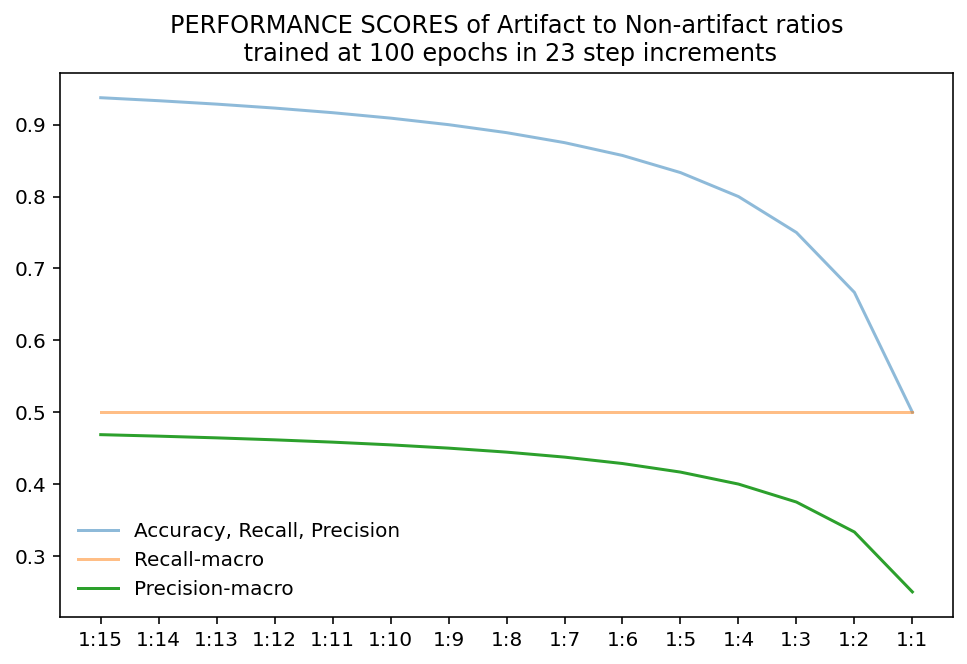

In [70]:
plt.figure(figsize=(8, 5))
plt.plot(ratioList, pred_acc, label='Accuracy, Recall, Precision',alpha=0.5)
plt.plot(ratioList, macro_recall, label='Recall-macro',alpha=0.5)
#plt.plot(ratioList, micro_recall, label='Recall-micro',alpha=0.5)
plt.plot(ratioList, macro_prec, label='Precision-macro',alpha=1)
#plt.plot(ratioList, micro_prec, label='Precision-micro',alpha=0.5)
#plt.plot(ratioList, ratios, label='Precision-micro',alpha=0.5)
plt.title(f'PERFORMANCE SCORES of Artifact to Non-artifact ratios'\
          f'\n trained at 100 epochs in 23 step increments')
plt.legend(frameon=False)
plt.show();


In [10]:
data_train_dir = '/scratch/adomakor412/train/'
data_test_dir = '/scratch/adomakor412/test/'
data_val_dir = '/scratch/adomakor412/val/'

trainloader, testloader, valloader = load_split_train_test(data_train_dir,
                                                           data_test_dir, 
                                                           data_val_dir)

In [11]:
# epoch =['MODELS/model_epoch_0_May-10-21:1605_1620677105.pth',
#         'MODELS/model_epoch_10_May-10-21:1605_1620677105.pth',
#         'MODELS/model_epoch_19_May-10-21:1605_1620677105.pth',
#         'MODELS/model_epoch_29_May-10-21:1605_1620677105.pth',
#         'MODELS/model_epoch_39_May-10-21:1605_1620677105.pth',
#         'MODELS/model_epoch_49_May-10-21:1605_1620677105.pth',
#         'MODELS/model_epoch_59_May-10-21:1605_1620677105.pth',
#         'MODELS/model_epoch_69_May-10-21:1605_1620677105.pth',
#         'MODELS/model_epoch_79_May-10-21:1605_1620677105.pth',
#         'MODELS/model_epoch_89_May-10-21:1605_1620677105.pth',
#         'MODELS/model_epoch_99_May-10-21:1605_1620677105.pth']

device = torch.device("cuda" if torch.cuda.is_available() 
                                  else "cpu")

model = models.resnet50(pretrained=True)

for param in model.parameters():
    param.requires_grad = False
    
model.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 2),
                                 nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
model.to(device);

In [ ]:
epochList = [1,10,20,30,40,50,60,70,80,90,100]

for epochs in epochList:
    steps = 0
    running_loss = 0
    print_every = 1#10
    train_losses, test_losses = [], []
    
    for epoch in range(epochs):
        for inputs, labels in trainloader:
            steps += 1
            print(steps)
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            logps = model.forward(inputs)
            loss = criterion(logps, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            #print('REACHED RUNNING LOSS')
            if steps % print_every == 0:
                #print('I am working')
                test_loss = 0
                accuracy = 0
                model.eval()
                with torch.no_grad():
                    for inputs, labels in testloader:
                        inputs, labels = inputs.to(device),labels.to(device)
                        logps = model.forward(inputs)
                        batch_loss = criterion(logps, labels)
                        test_loss += batch_loss.item()

                        ps = torch.exp(logps)
                        top_p, top_class = ps.topk(1, dim=1)
                        equals = top_class == labels.view(*top_class.shape)
                        accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                train_losses.append(running_loss/len(trainloader))
                test_losses.append(test_loss/len(testloader))                    
                print(f"Epoch {epoch+1}/{epochs}.. "
                      f"Train loss: {running_loss/print_every:.3f}.. "
                      f"Test loss: {test_loss/len(testloader):.3f}.. "
                      f"Test accuracy: {accuracy/len(testloader):.3f}")
                running_loss = 0
                model.train()

    plt.plot(train_losses, label='Training loss')
    plt.plot(test_losses, label='Validation loss')
    plt.title(f'Loss function: step increments =23 \n epochs = {epoch+1}')
    plt.legend(frameon=False)
    plt.show()
    plt.savefig(f'Epoch-{epoch+1} curve')
    plt.close()

1
